# Matplotlib: продолжение

Проведем небольшое исследование, основанное на материале данной статьи.<br>
<a href="https://nplus1.ru/news/2018/01/17/roasted">https://nplus1.ru/news/2018/01/17/roasted</a> <br>
В ней студенты провели исследование и выяснили, что картофель по-деревенски следует разрезать несколько иным способом, чтобы получить лучший вкус. Помимо этого картофель становится более приятным на вид и более хрустящим.<br>
У нас нет исходных данных по результатам опроса, но допустим, что они были распределены нормально со средним, указанным на графиках. Попробуем сгенерировать различные исходные данные, варьируя при этом дисперсию распределений.<br>

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

In [2]:
taste_cl=np.random.normal(7.2, 2.0, 100)
taste_new=np.random.normal(7.8, 2.0, 100)
crunch_cl=np.random.normal(6.4, 2.0, 100)
crunch_new=np.random.normal(8.5, 2.0, 100)
visual_cl=np.random.normal(7.8, 2.0, 100)
visual_new=np.random.normal(8.0, 2.0, 100)
averages_cl=np.array([np.average(taste_cl), np.average(crunch_cl), np.average(visual_cl)])
averages_cl=np.append(averages_cl, np.average(averages_cl))
averages_new=np.array([np.average(taste_new), np.average(crunch_new), np.average(visual_new)])
averages_new=np.append(averages_new, np.average(averages_new))

Построим теперь графики, показанные в статье, по сгенерированным данным (но плоские, а не трехмерные). Для этого используем столбчатую диаграмму (ax.bar) в которую передаются координаты по двум осям и другие известные нам параметры. Для того, чтобы графики не пересекались будем использовать смещение на ширину столбца. То есть получается, что между соседними показателями по оси X расстаяние равно 1, ширина каждого из столбцов 0.35, на расстояние между парами столбцов остается 0.3. <br>
Следующая особенность - использование тиков, то есть засечек (в нашем случае - по оси X). При помощи функции set_xticks передаем расположение засечек, а при помощи set_xticklabels задаем поддписи под засечками.

<IPython.core.display.Javascript object>


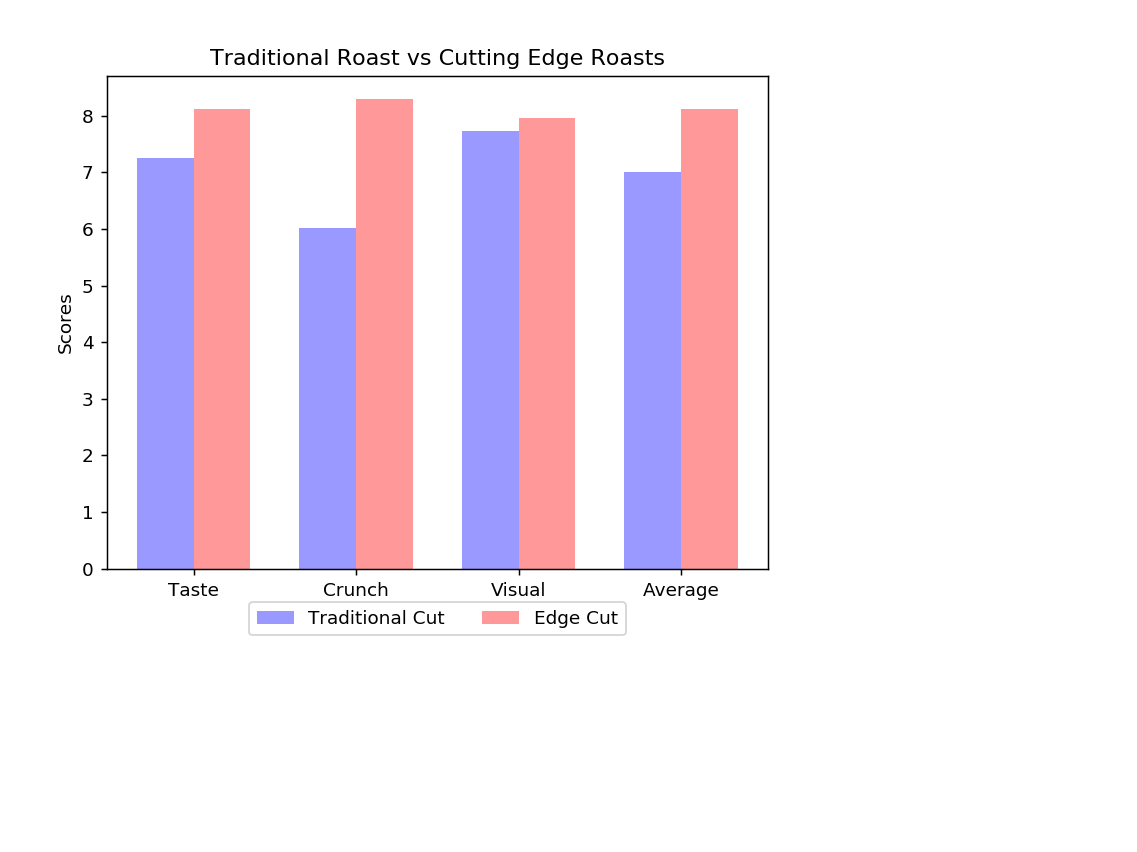

In [3]:
fig, ax = plt.subplots()
index = np.arange(4)
bar_width, opacity = 0.35, 0.4
rects1 = ax.bar(index, averages_cl, bar_width, alpha=opacity, color='b', label='Traditional Cut')
rects1 = ax.bar(index + bar_width, averages_new, bar_width, alpha=opacity, color='r', label='Edge Cut')
ax.set_ylabel('Scores')
ax.set_title('Traditional Roast vs Cutting Edge Roasts')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Taste', 'Crunch', 'Visual', 'Average'))
ax.legend(loc = 'upper center', ncol=2, bbox_to_anchor=(0.5,-0.05))

plt.show()

Теперь убедимся, что по всем параметрам у нас имеется нормальное распределение. Для этого просто нарисуем гистограммы.<br>
Сразу становится видно несколько проеблем. Во-первых, никто не проверил, что сгенерированы данные из интервала [0, 10] (часть данных выходит за этот интервал). Во-вторых, на ум приходит идея, что заодно никто не гарантировал, что данные будут целыми. Наконец, в-третьих, становятся видны проблемы с симметричностью распределения.<br>
Возвращаясь к Matplotlib. Функция hist принимает набор данных, для которых необходимо посчитать гистограмму и количество интервалов в ней (остальные параметры нам уже знакомы). Она настолько любезна, что возвращает значения. раскиданные по интервалам, границы интервалов и список объектов со столбиками.<br>

<IPython.core.display.Javascript object>


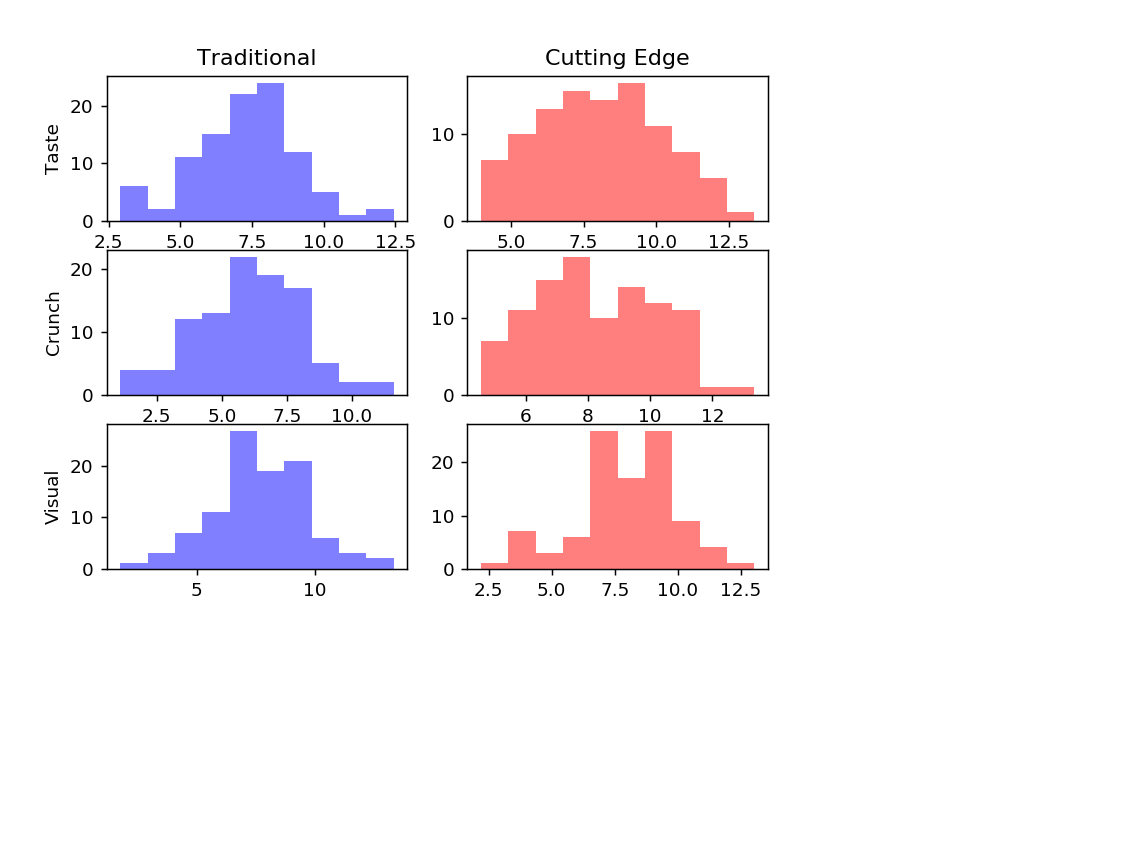

In [4]:
fig=plt.figure(1)
ax=fig.add_subplot(321)
plt.title('Traditional')
ax.set_ylabel('Taste')
n, bins, patches = plt.hist(taste_cl, 10, facecolor='b', alpha=0.5)
ax=fig.add_subplot(322)
plt.title('Cutting Edge')
n, bins, patches = plt.hist(taste_new, 10, facecolor='r', alpha=0.5)
ax=fig.add_subplot(323)
ax.set_ylabel('Crunch')
n, bins, patches = plt.hist(crunch_cl, 10, facecolor='b', alpha=0.5)
ax=fig.add_subplot(324)
n, bins, patches = plt.hist(crunch_new, 10, facecolor='r', alpha=0.5)
ax=fig.add_subplot(325)
ax.set_ylabel('Visual')
n, bins, patches = plt.hist(visual_cl, 10, facecolor='b', alpha=0.5)
ax=fig.add_subplot(326)
n, bins, patches = plt.hist(visual_new, 10, facecolor='r', alpha=0.5)

plt.show()

#print(patches[0], patches[1])

Для построения двумерной гистограммы можно использовать функцию <a href="https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist2d.html">hist2d</a>, в которую передается два массива данных (с X и Y координатами).<br>

<IPython.core.display.Javascript object>


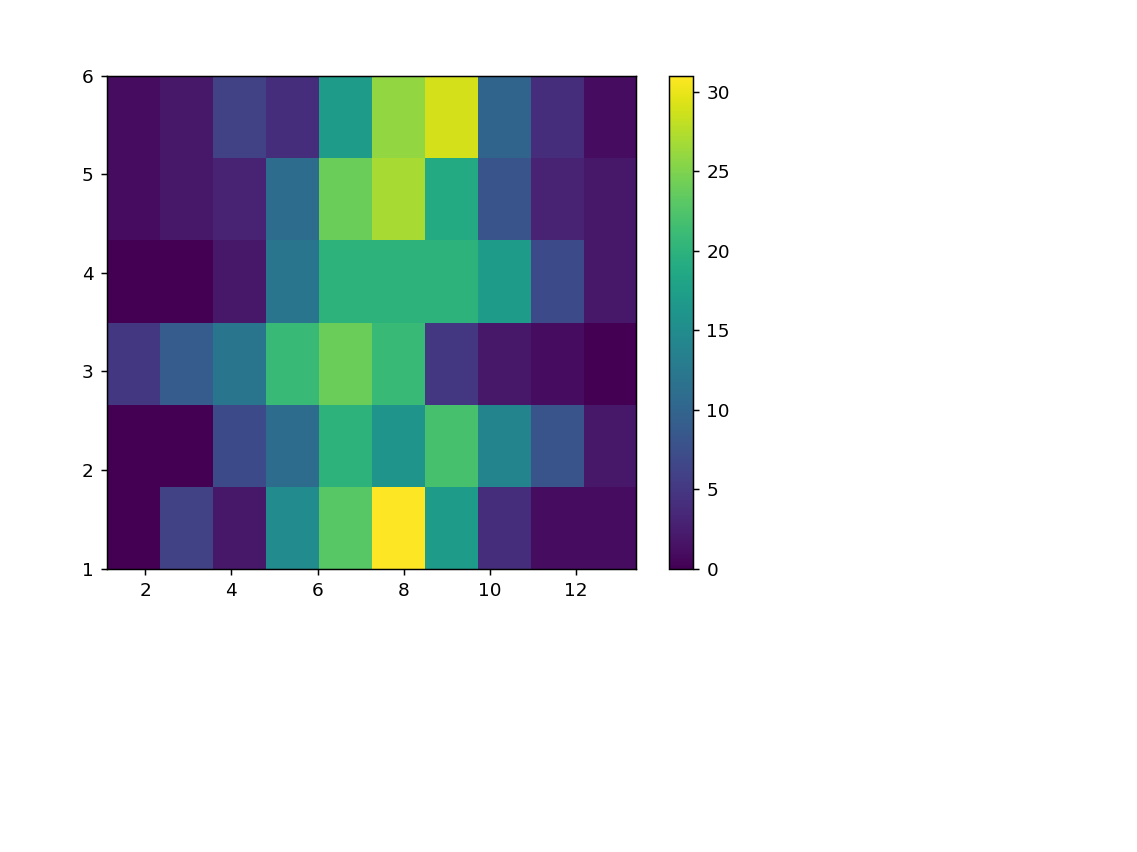

In [5]:
alldata=np.concatenate((taste_cl, taste_new, crunch_cl, crunch_new, visual_cl, visual_new))
allsets=np.concatenate((np.ones(100), np.ones(100)*2, np.ones(100)*3, np.ones(100)*4, np.ones(100)*5, np.ones(100)*6))
fig, ax=plt.subplots()
plt.hist2d(alldata, allsets, bins=[10,6])
plt.colorbar()
plt.show()

Полученная гистограмма показывает, насколько не совпадают средние значения для традиционного и предложенного методов. Однако пообная разница может быть лишь отклонениемм, связанным с выборкой. Теперь нам необходимо проверить статистическую значимость подобного отклонения. <br>
В соответствии с существующими <a href="https://stepik.org/course/76/">методами проверки статистической значимости</a> рассчитаем доверительный интервал как $M \pm \alpha * se$, где $se=\frac{s^2}{\sqrt{n}}$, $s^2$ - дисперсия, а $n$ - количество экспериментов (в нашем случае - 100). $\alpha$ выбирается исходя из необходимого уровня достоверности (в нашем случае равнялось 1,96).<br>
Для отображения стандартной ошибки используется параметр yerr (существует также параметр xerr, который показывает ошибку по оси X; при использовании обоих параметров ошибка приобретает форму креста). Ее параметры отображения задаются параметром error_kw.<br>
Но так как нам хочется ориентироваться на числовые данные, то в низ графика доблавляем таблицу с ними. Мы делаем это при помощи функции <a href="https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.table.html">plt.table</a>, в которую передаются строковая таблица, подписи по колонкам и строкам, расположение таблицы.


<IPython.core.display.Javascript object>


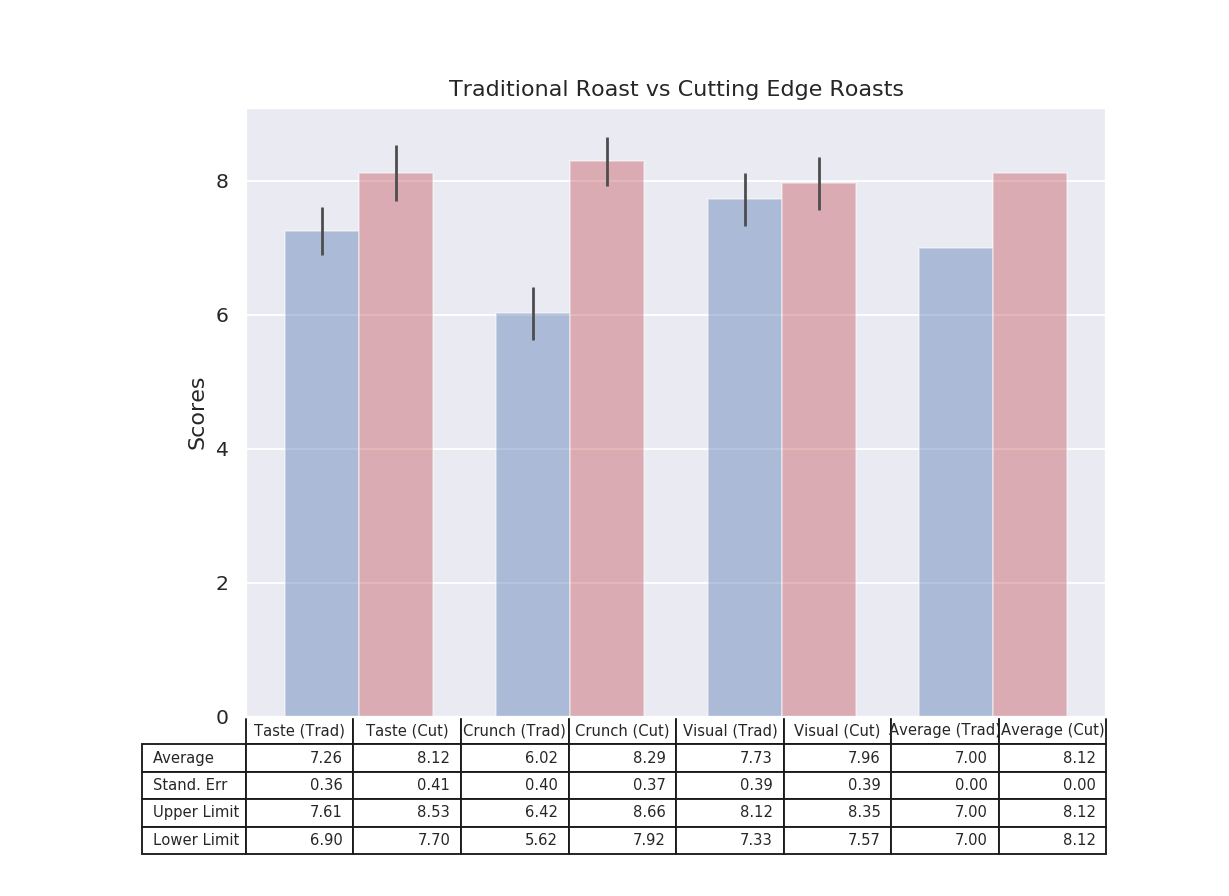

In [34]:
sterr_cl = 1.96 * np.array([np.std(taste_cl), np.std(crunch_cl), np.std(visual_cl), 0])/10
sterr_new = 1.96 * np.array([np.std(taste_new), np.std(crunch_new), np.std(visual_new), 0])/10

fig, ax = plt.subplots()
index = np.arange(4)
bar_width, opacity = 0.35, 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, averages_cl, bar_width, yerr=sterr_cl, error_kw=error_config, alpha=opacity, color='b', label='Traditional Cut')
rects1 = ax.bar(index + bar_width, averages_new, bar_width, yerr=sterr_new, error_kw=error_config, alpha=opacity, color='r', label='Edge Cut')
ax.set_ylabel('Scores')
ax.set_title('Traditional Roast vs Cutting Edge Roasts')
# Убираем подписи по оси Х и легенду, как будто таблица сама служит подписью.
#ax.set_xticks(index + bar_width / 2)
#ax.set_xticklabels(('Taste', 'Crunch', 'Visual', 'Average'))
#ax.legend(loc = 'upper center', ncol=2, bbox_to_anchor=(0.5,-0.05))
ax.set_xticks([])

# Рисуем таблицу
columns = ('Taste (Trad)', 'Taste (Cut)', 'Crunch (Trad)', 'Crunch (Cut)', 'Visual (Trad)', 'Visual (Cut)', 'Average (Trad)', 'Average (Cut)')
rows = ['Average', 'Stand. Err', 'Upper Limit', 'Lower Limit']
cell_text = [[],[],[],[]]
for i in range(4):
    cell_text[0].append('%1.2f' % (averages_cl[i]))
    cell_text[0].append('%1.2f' % (averages_new[i]))
for i in range(4):
    cell_text[1].append('%1.2f' % (sterr_cl[i]))
    cell_text[1].append('%1.2f' % (sterr_new[i]))
for i in range(4):
    cell_text[2].append('%1.2f' % (averages_cl[i] + sterr_cl[i]))
    cell_text[2].append('%1.2f' % (averages_new[i] + sterr_new[i]))
for i in range(4):
    cell_text[3].append('%1.2f' % (averages_cl[i] - sterr_cl[i]))
    cell_text[3].append('%1.2f' % (averages_new[i] - sterr_new[i]))

the_table = plt.table(cellText=cell_text, rowLabels=rows, colLabels=columns, loc='bottom')
# Просим таблицу не подбирать шрифт автоматически, устанавливаем 8-й кегль, даем больше места снизу графика.
the_table.auto_set_font_size(False)
the_table.set_fontsize(8)
plt.subplots_adjust(left=0.2, bottom=0.2)
plt.show()

Также построим построим две <a href="https://ru.wikipedia.org/wiki/%D0%AF%D1%89%D0%B8%D0%BA_%D1%81_%D1%83%D1%81%D0%B0%D0%BC%D0%B8">диаграммы размаха</a>. Для этого попросим создать два графика (одна строка, две колонки)<br>
<a href="https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.subplots.html">plt.subplots</a>(nrows=1, ncols=2, figsize=(9, 4))<br>
Отрисуем на них диаграммы размаха при помощи функции boxplot, в которую передаются массивы данных, для которых нужно строить диаграммы, расположение и метки для диаграмм. Также просим сделать диаграммы разноцветными (patch_artist=True и далее patch.set_facecolor(color)).

<IPython.core.display.Javascript object>


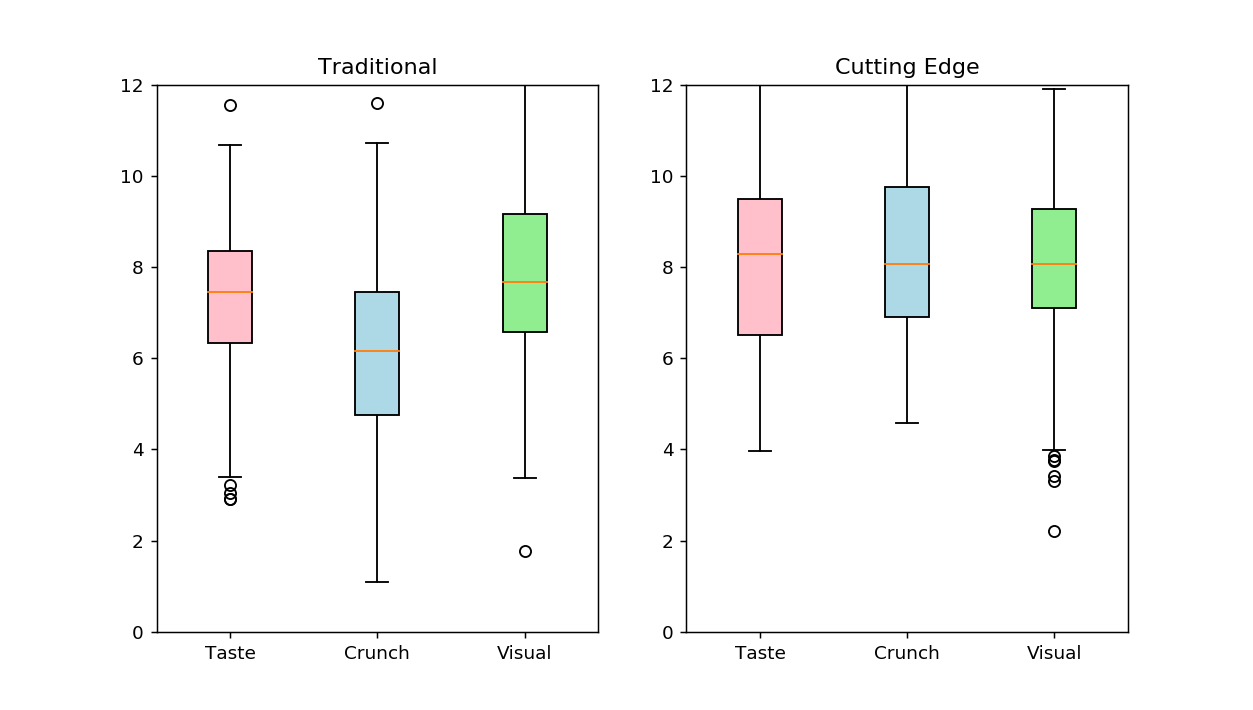

In [7]:
all_cl=np.ones((100, 3))
all_cl[:,0]=taste_cl
all_cl[:,1]=crunch_cl
all_cl[:,2]=visual_cl
all_new=np.ones((100, 3))
all_new[:,0]=taste_new
all_new[:,1]=crunch_new
all_new[:,2]=visual_new

labels = ['Taste', 'Crunch', 'Visual']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
axes[0].set_ylim([0, 12])
bplot1 = axes[0].boxplot(all_cl,vert=True, patch_artist=True, labels=labels)
axes[0].set_title('Traditional')
bplot2 = axes[1].boxplot(all_new, vert=True, patch_artist=True, labels=labels)
axes[1].set_ylim([0, 12])
axes[1].set_title('Cutting Edge')
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

plt.show()



# Seaborn

Более новой библиотекой является Seaborn. У него побольше возможностей и по умолчанию покрасивее рисунки.

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns

Сгенерируем данные в DataFrame (потому что seaborn просто предназначен для работы с Pandas). Средние значения оставим такими же, какими они были.

In [17]:
pd1=pd.DataFrame()
pd2=pd.DataFrame()

pd1['Values']=np.random.normal(7.2, 2.0, 100)
pd1['Type']='Taste Cls'
pd2['Values']=np.random.normal(7.8, 2.0, 100)
pd2['Type']='Crunch Cls'
pd1=pd1.append(pd2)
pd2['Values']=np.random.normal(6.4, 2.0, 100)
pd2['Type']='Visual Cls'
pd1=pd1.append(pd2)

pd2['Values']=np.random.normal(8.5, 2.0, 100)
pd2['Type']='Taste New'
pd1=pd1.append(pd2)
pd2['Values']=np.random.normal(7.8, 2.0, 100)
pd2['Type']='Crunch New'
pd1=pd1.append(pd2)
pd2['Values']=np.random.normal(8.0, 2.0, 100)
pd2['Type']='Visual New'
pd1=pd1.append(pd2)

pd1.head()

,Values,Type
0,10.194802,Taste Cls
1,3.254101,Taste Cls
2,11.144306,Taste Cls
3,8.395979,Taste Cls
4,7.729426,Taste Cls


Построим теперь графики.<br>
Как мы выяснили в прошлый раз, мы совершенно зря генерируем данные с оценками больше 10, так как изначально такая оценка не предусматривалась. Попробуем оценить количество таких значений. Для этого построим гистограмму с количеством таких оценок.<br>
В seaborn для этого используется метод countplot. В него передаются DataFrame и от одного до трех параметров - <b>x</b>, <b>y</b> и <b>hue</b>, в которых хранятся названия столбцов из DataFrame либо сами отображаемые данные. Параметр <b>x</b> используется для разделения значений на отдельные столбцы гистограммы.<br>
В простейшем случае гистограмма будет выглядеть вот так.<br>

<IPython.core.display.Javascript object>


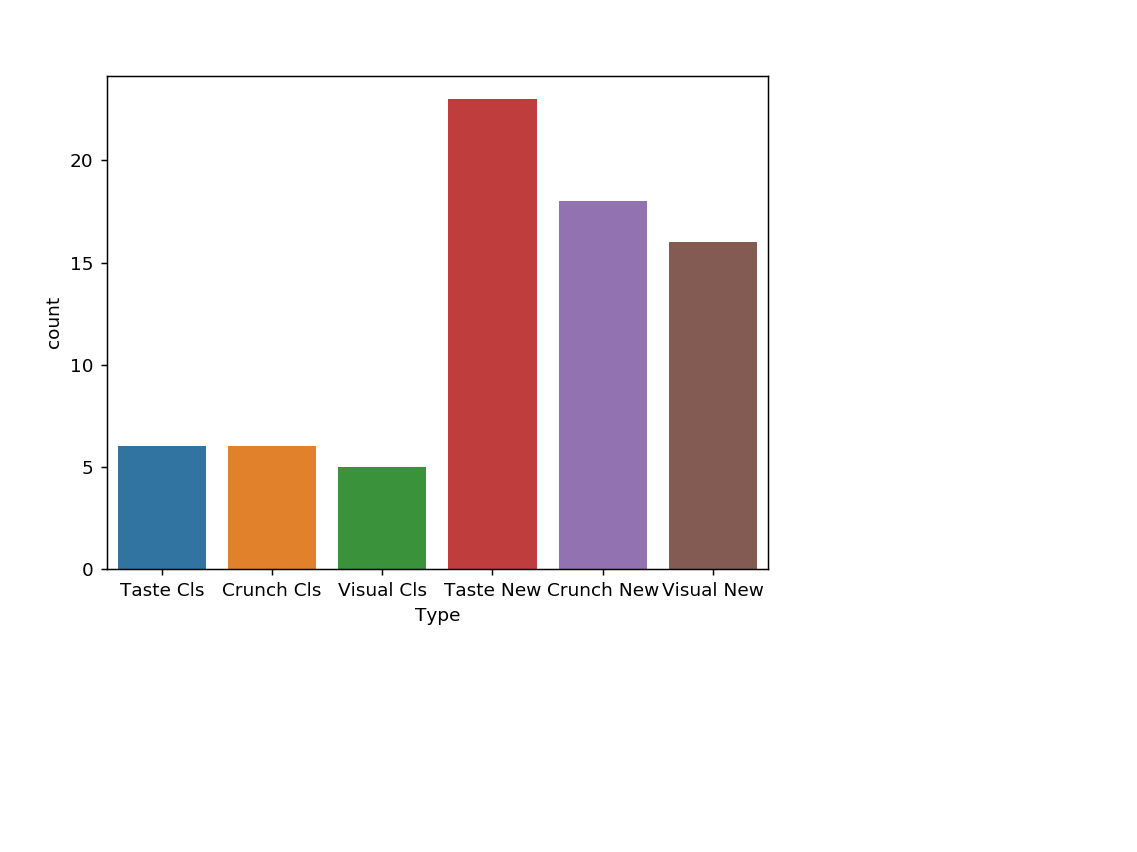

In [18]:
ax2=sns.countplot(x='Type', data=pd1[pd1['Values']>10])

Если переданы данные, параметр `orient` будет определять ориентацию гистограммы: вертикальная ('v') или горизонтальная ('h').<br>
Параметр `order` показывавет порядок следования значений парамтеров по выбранной оси. Если он не указан, значения будут следовать в том порядке, в котором они выбираются из DataFrame.<br>

<IPython.core.display.Javascript object>


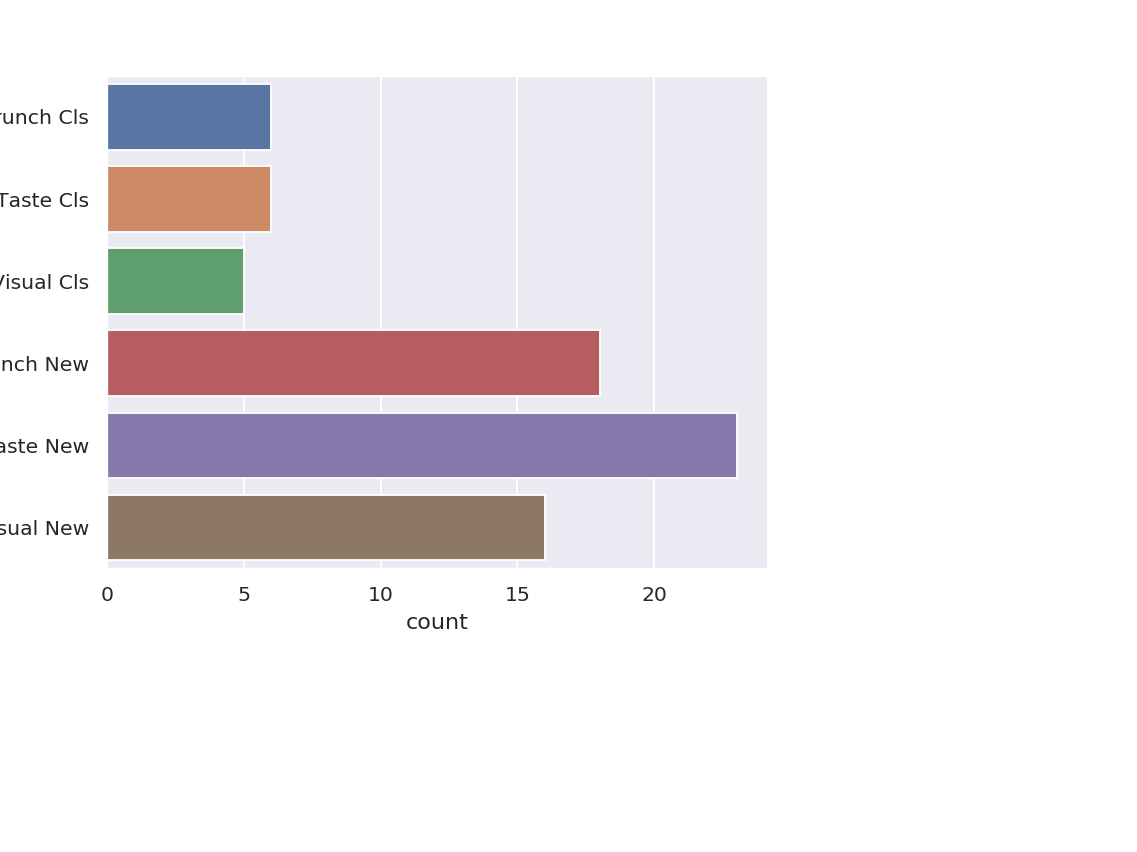

In [35]:
ax2=sns.countplot(y='Type', data=pd1[pd1['Values']>10], order=['Crunch Cls', 'Taste Cls', 'Visual Cls', 'Crunch New', 'Taste New', 'Visual New'])

Кстати, подключение seaborn влияет на отрисовку графиков при помощи Pandas.<br>
Вызов `sns.set(style="darkgrid")` меняет оформление графиков - они будут рисоваться на светло-сером фоне с белыми линиями сетки.

<IPython.core.display.Javascript object>


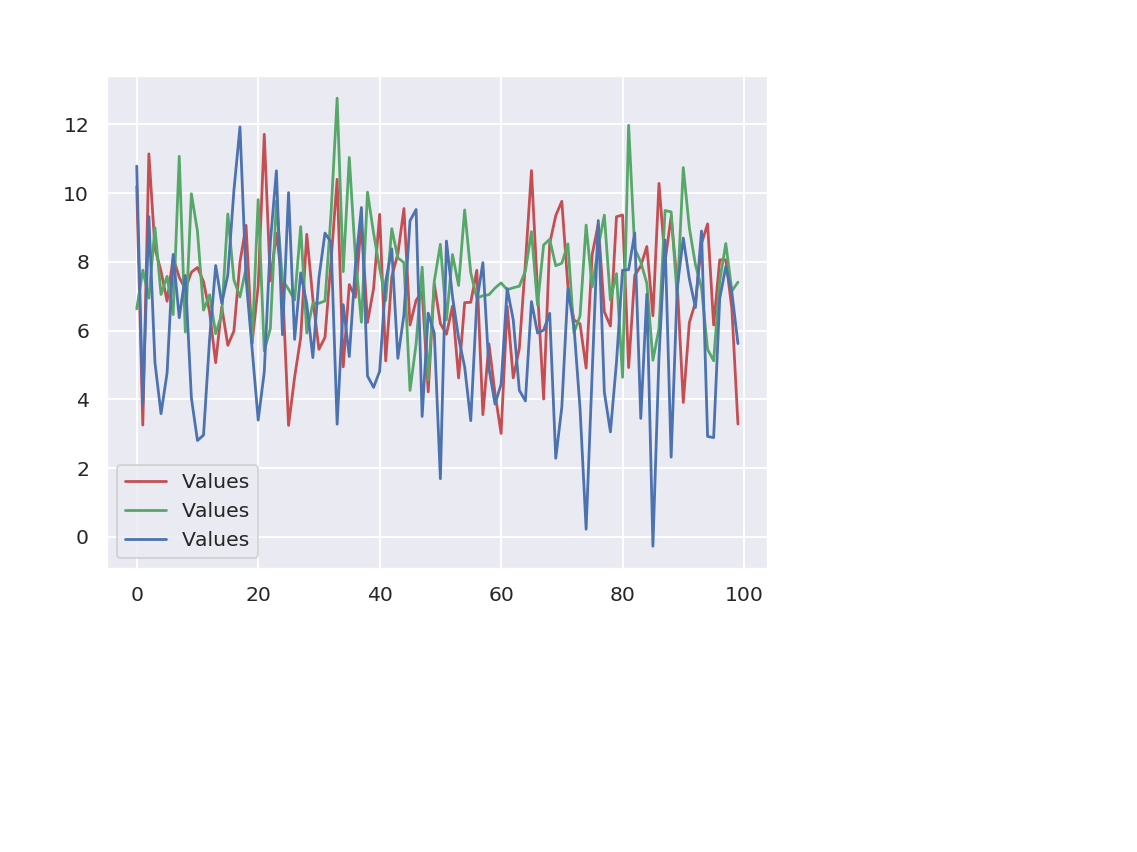

In [20]:
sns.set(style="darkgrid")
ax2=pd1[:100].plot(color='r')
ax2=pd1[100:200].plot(ax=ax2, color='g')
ax2=pd1[200:300].plot(ax=ax2, color='b')
#ax2=pd1.plot()

Теперь отрисуем диаграмму размаха, используя seaborn. Для этого используем метод boxplot, в который передаются те же самые параметры. 

<IPython.core.display.Javascript object>


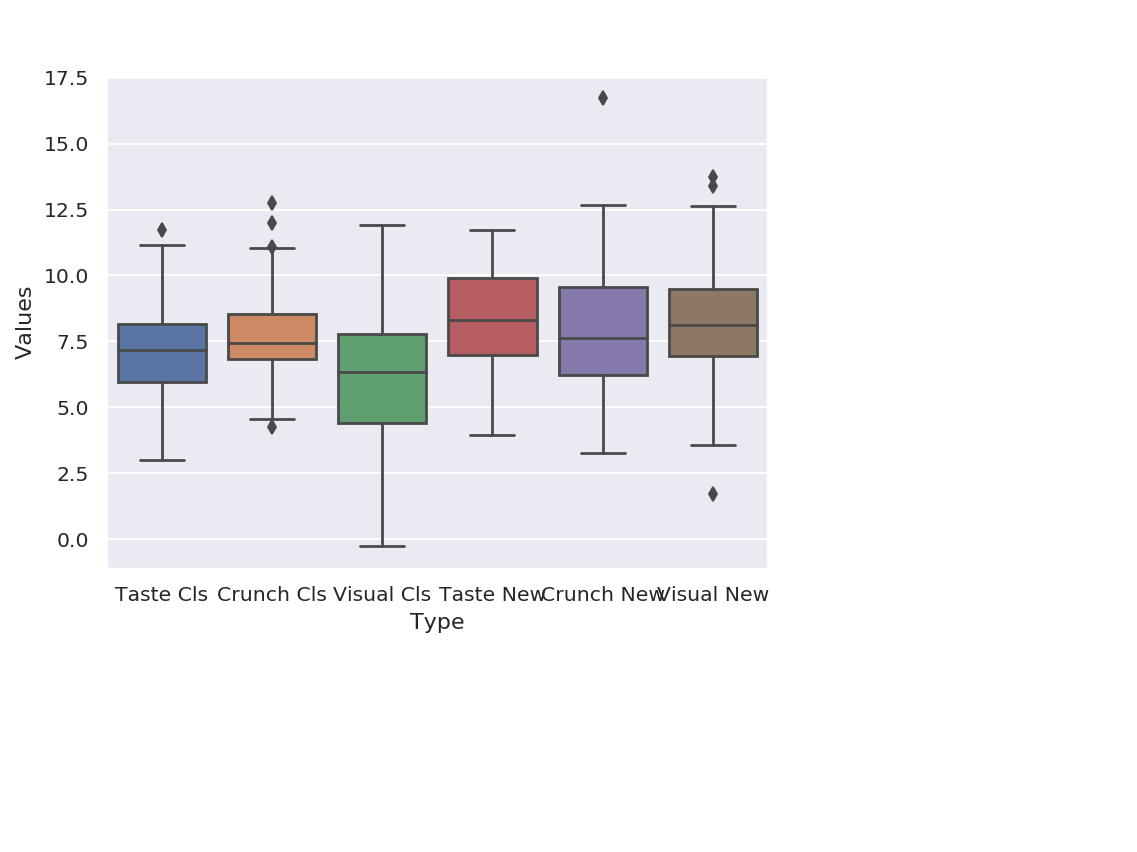

In [21]:
ax2=sns.boxplot(x='Type', y='Values', data=pd1)

А теперь отрисуем Violin Plot. На нем с двух отображается функция плотности распределения вероятности. За счет этого можно оценить форму распределения (если получится ее оценить визуально). Помимо плотности функции распределения он показывает стандартные "ящик" и "усы" от диаграммы размаха (не в толщиной линий). <br>
Параметры у функции те же.

<IPython.core.display.Javascript object>


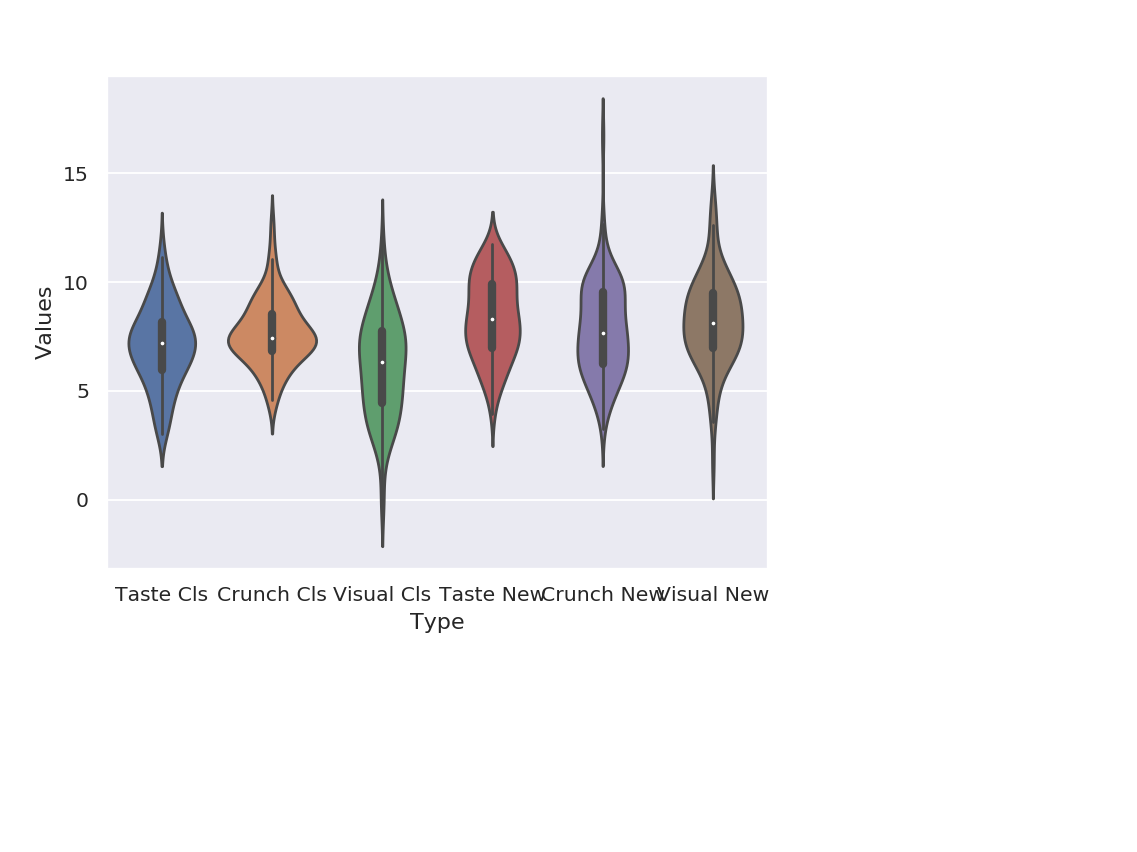

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [26]:
ax2=sns.violinplot(x='Type', y='Values', data=pd1)

Еще одним вариантом отображения расположения точек является swarmplot. Он показывает расположение точек так, чтобы их проекция приходилась на их положение по выбранной оси.

<IPython.core.display.Javascript object>


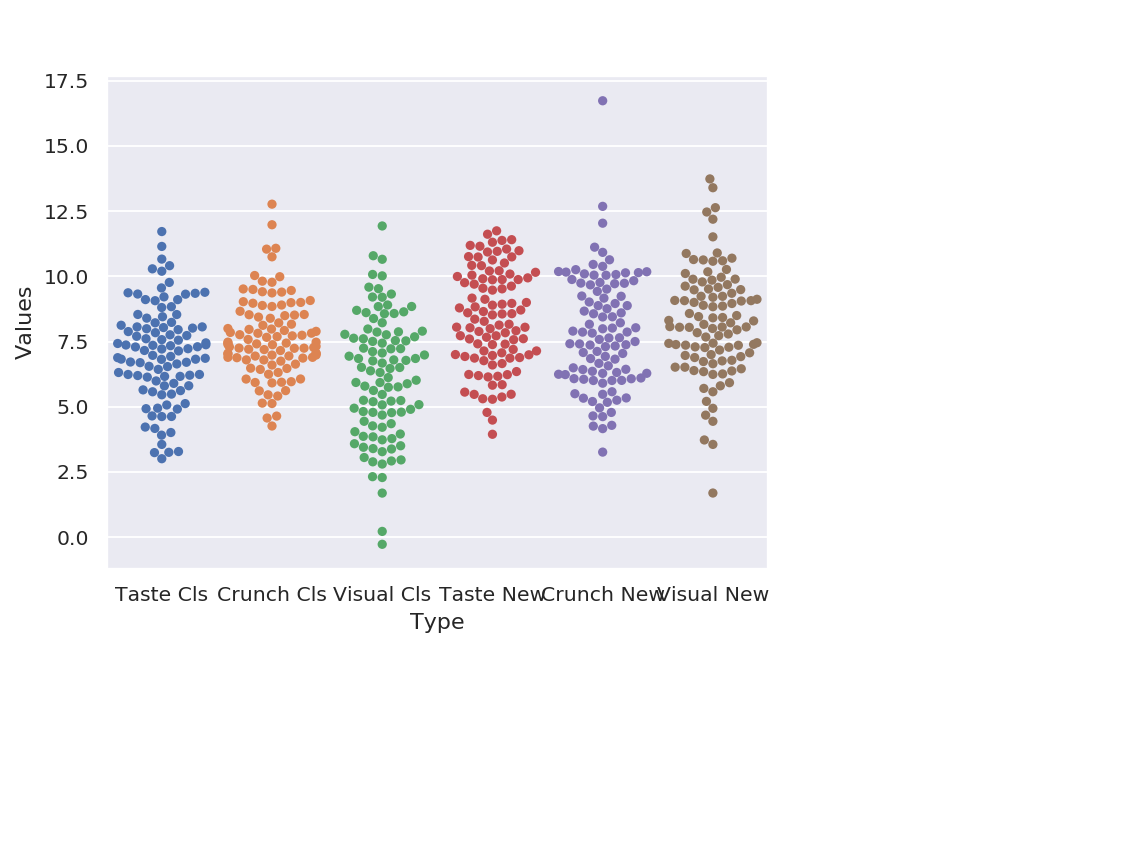

In [27]:
ax2=sns.swarmplot(x='Type', y='Values', data=pd1)

Наконец, мы можем совместить два вида диаграмм на одной. Используем одновременно violinplot и swarmplot.<br>
Чтобы было лучше видно, используем разные палитры (о них можно почитать <a href="http://seaborn.pydata.org/tutorial/color_palettes.html">здесь</a>).

<IPython.core.display.Javascript object>


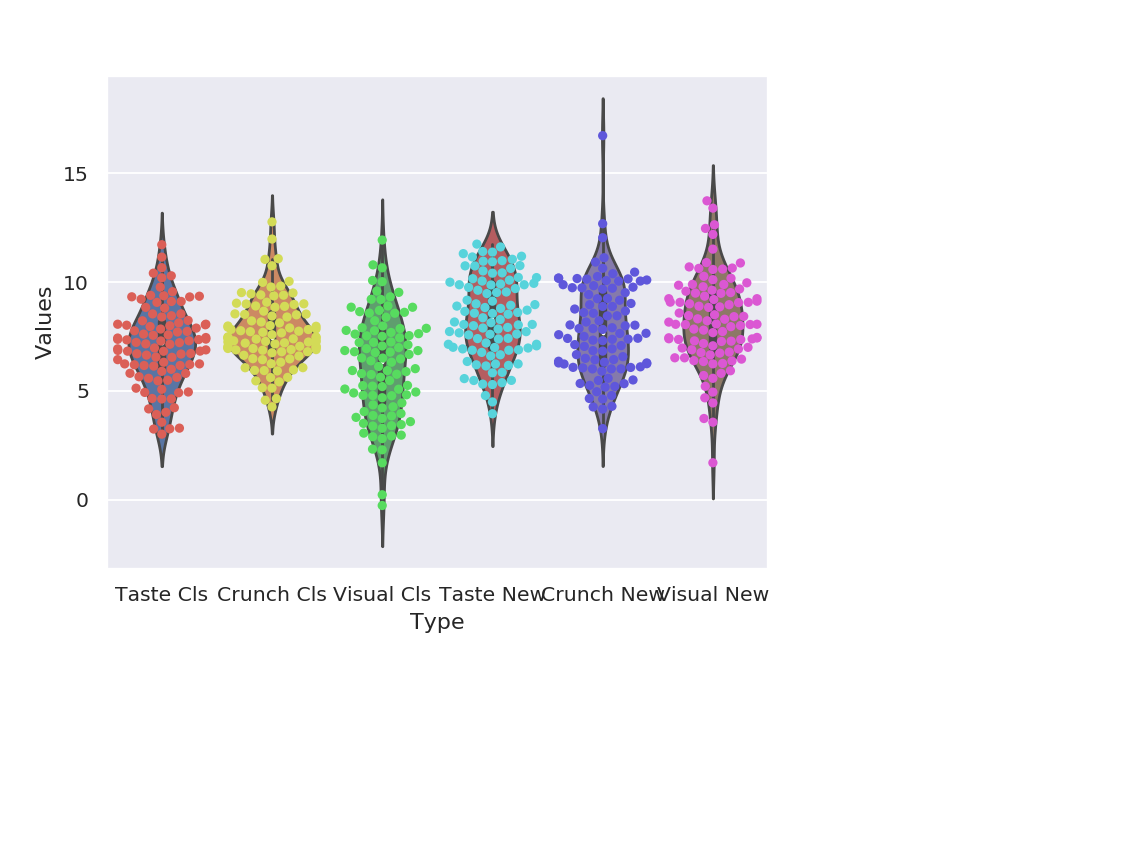

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [28]:
ax2=sns.violinplot(x='Type', y='Values', data=pd1)
ax2=sns.swarmplot(x='Type', y='Values', data=pd1, palette="hls", ax=ax2)

А теперь посмотрим как работает график, называемый "тепловая карта". Данный график группирует между собой некоторые показатели и отображает их в виде таблицы, в которой сходные объекты находятся рядом. Для этого используется clustermap. В минимальной комплектации в него можно подать только квадратную матрицу с мерами сходства между объектами, остальную раоту он проделает сам.<br> 
Для проверки подсунем ему матрицу сходства между языками, рассчитанную в некотором предыдущем исследовании. Загрузим данные.

In [30]:
dfc=pd.read_csv("lang_correlations_syntax.csv", sep=";", index_col=0)
dfc.head()


,Czech,Slovak,Polish,Russian,Ukrainian,Bulgarian,Croatian,Serbian,Slovenian,Church Slavonic,...,Hindi,Urdu,Persian,Japanese,Chinese,Korean,Indonesian,Vietnamese,Basque,Turkish
Czech,1.000000,0.895674,0.795171,0.884275,0.927431,0.896647,0.771611,0.607420,0.868906,0.414214,...,0.138122,0.079089,0.182288,-0.036511,0.357868,0.142249,0.423253,0.248573,0.809449,0.754505
Slovak,0.895674,1.000000,0.623924,0.839251,0.870940,0.848789,0.890183,0.756875,0.830268,0.385672,...,0.091970,0.041430,0.068824,-0.037155,0.423776,0.062552,0.362361,0.197325,0.799467,0.696398
Polish,0.795171,0.623924,1.000000,0.597016,0.694101,0.645924,0.499894,0.381591,0.594005,0.326089,...,0.057360,0.047146,0.264447,-0.030214,0.172030,0.069919,0.248904,0.179266,0.563346,0.525508
Russian,0.884275,0.839251,0.597016,1.000000,0.963361,0.913424,0.779023,0.613041,0.892276,0.440570,...,0.132448,0.101048,0.095341,-0.029992,0.378713,-0.007593,0.408374,0.241255,0.731220,0.752968
Ukrainian,0.927431,0.870940,0.694101,0.963361,1.000000,0.912538,0.772673,0.600710,0.907300,0.446848,...,0.149046,0.090362,0.097057,-0.029297,0.387099,-0.015692,0.387326,0.234496,0.769298,0.789824


А теперь попробуем на них тепловую карту.<br>
Получается довольно-таки похоже на правду.

<IPython.core.display.Javascript object>


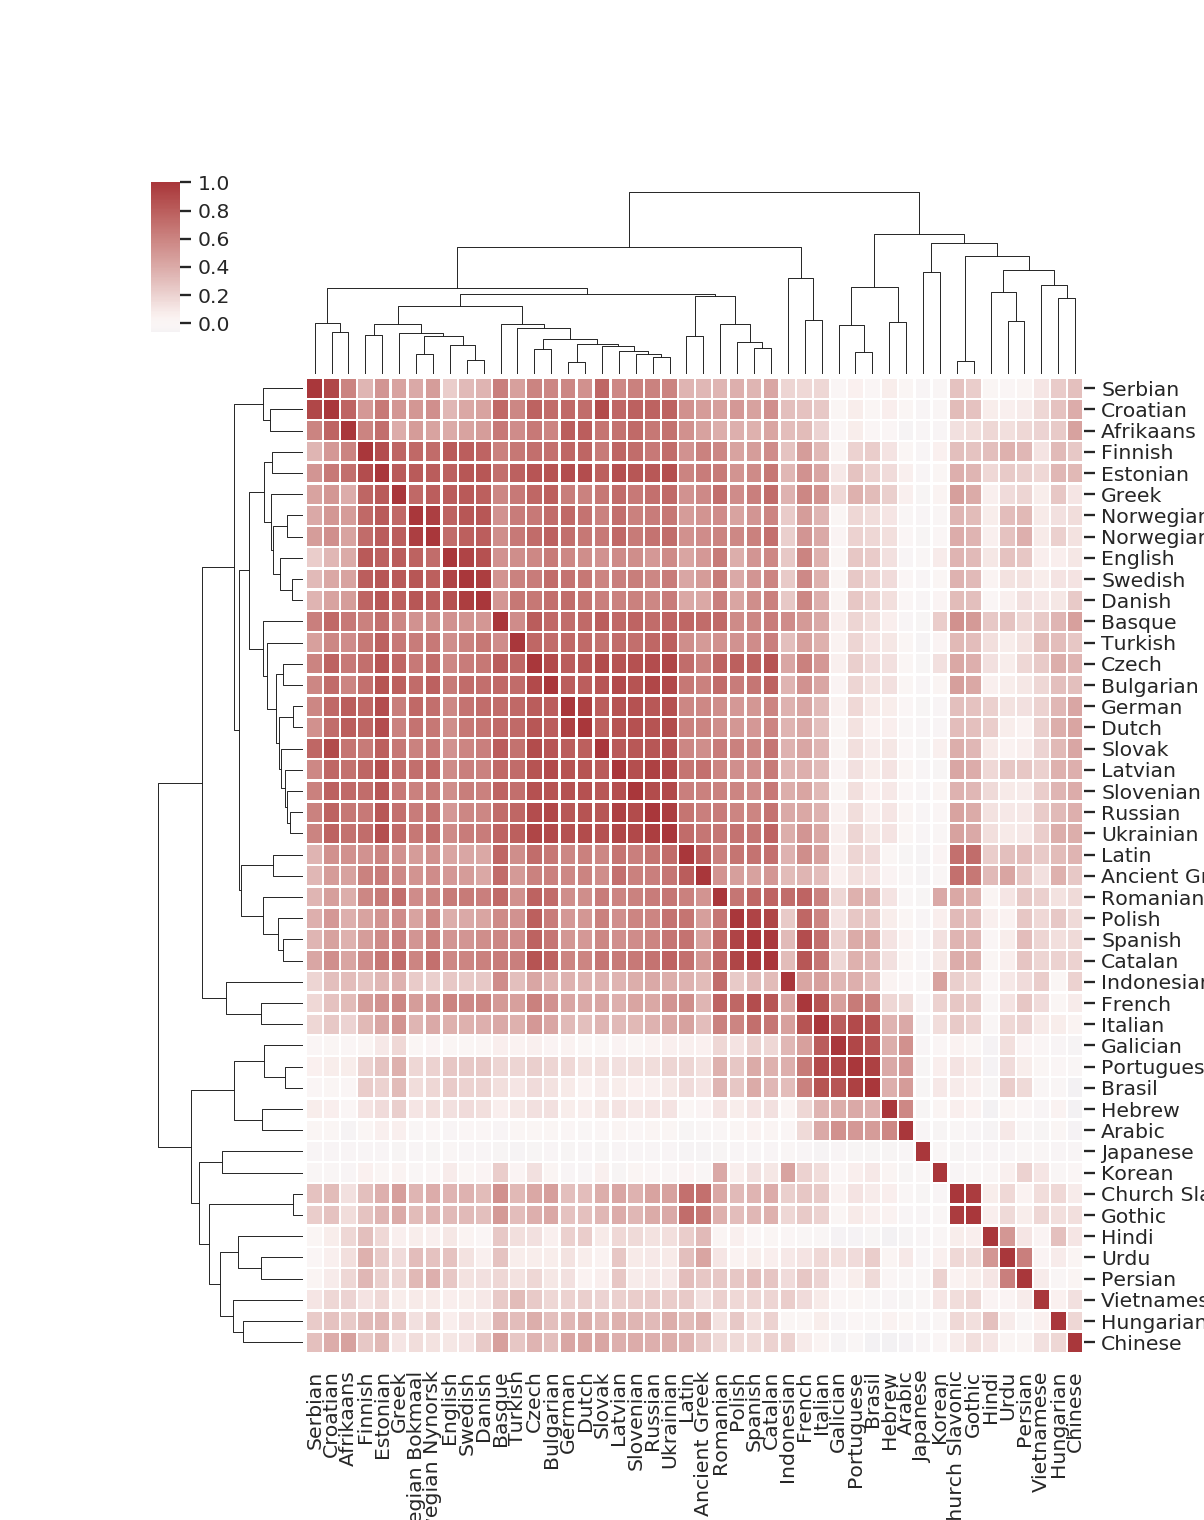

In [31]:
sns.clustermap(dfc, center=0, cmap="vlag", linewidths=.75, figsize=(13, 13))